In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
import warnings 
warnings.filterwarnings("ignore")

In [4]:
data =pd.read_csv("HR_comma_sep.csv")
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [5]:
data.shape

(14999, 10)

In [6]:
data.head(4)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [9]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [10]:
data.sample()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
14499,0.82,0.91,5,232,5,0,1,0,technical,low


In [11]:
data.Work_accident.value_counts()

Work_accident
0    12830
1     2169
Name: count, dtype: int64

In [12]:
left = data[data.left==1]
left.shape

(3571, 10)

In [13]:
left = data[data.left==0]
left.shape

(11428, 10)

In [14]:
salary_dum = pd.get_dummies(data.salary).astype(int)

In [15]:
salary_dum

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [16]:
final_data=pd.concat([data,salary_dum],axis=1)
final_data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,high,low,medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,support,low,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,support,low,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,support,low,0,1,0


In [17]:
final_data.drop(["salary","Department"],axis=1,inplace=True)

<Axes: >

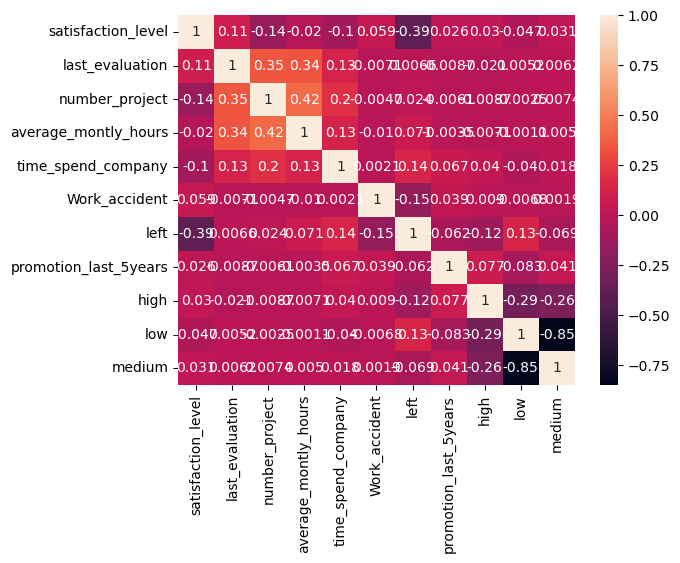

In [67]:
import seaborn as sns
sns.fi
sns.heatmap(final_data.corr(),annot=True)

In [18]:
final_data.groupby("left").mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,high,low,medium
left,,,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251,0.101068,0.450123,0.448810
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321,0.022963,0.608233,0.368804


In [19]:
X = final_data[['satisfaction_level','average_montly_hours',"time_spend_company","Work_accident","promotion_last_5years","high","low","medium"]]
X.head()

,satisfaction_level,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,high,low,medium
0,0.38,157,3,0,0,0,1,0
1,0.80,262,6,0,0,0,0,1
2,0.11,272,4,0,0,0,0,1
3,0.72,223,5,0,0,0,1,0
4,0.37,159,3,0,0,0,1,0


In [20]:
Y =final_data.left
Y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,train_size=0.8)

In [22]:
X_train

,satisfaction_level,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,high,low,medium
2551,0.72,256,3,0,0,0,1,0
9305,0.54,252,3,0,0,0,0,1
3857,0.71,221,4,0,0,0,0,1
4139,0.92,180,3,0,0,0,1,0
8639,0.58,143,2,0,0,0,1,0
...,...,...,...,...,...,...,...,...
12696,0.10,291,4,0,0,1,0,0
1354,0.10,273,4,0,0,0,0,1
7719,0.75,250,5,0,0,0,0,1
7764,0.40,99,2,1,0,1,0,0


In [23]:
y_train

2551     0
9305     0
3857     0
4139     0
8639     0
        ..
12696    1
1354     1
7719     0
7764     0
14436    1
Name: left, Length: 11999, dtype: int64

In [24]:
Model_log = LogisticRegression()
Model_log.fit(X_train,y_train)

LogisticRegression()

In [25]:
Model_log.score(X_train,y_train)

0.7675639636636387

In [26]:
Model_log.score(X_test,y_test)

0.771

In [28]:
X.sample()

,satisfaction_level,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,high,low,medium
6334,0.65,133,3,0,0,0,0,1


In [63]:
Model_log.predict([[.90,20,5,1,0,0,1,0]])[0]

0

In [83]:
y_pred =Model_log.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [85]:
from sklearn.metrics import confusion_matrix

In [107]:
conf = confusion_matrix(y_pred,y_test)
conf

array([[2132,  526],
       [ 161,  181]], dtype=int64)

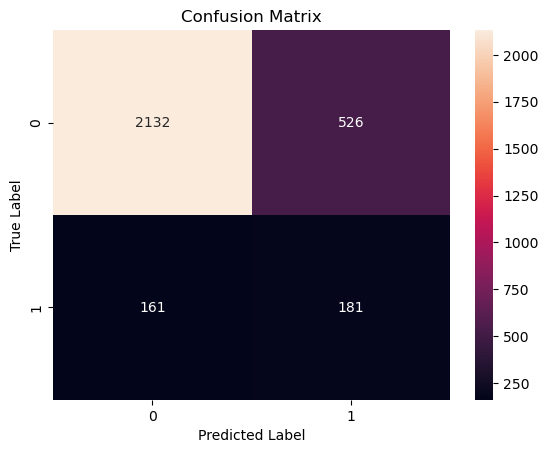

In [111]:
sns.heatmap(conf, annot=True,  fmt='d')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()